This notebook is based purely on video tutorial [Andrej Karpathy's](https://www.youtube.com/@AndrejKarpathy) - [The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1)

[micrograd_Github_repo](https://github.com/karpathy/micrograd)

Working along the video has been a great learning for me!

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Understanding derivative

In [2]:
# any function - taking an example of quadratic
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
# compute for an x value
f(3)

20

In [4]:
# compute for a range x values - ranging from -5 to 5
xs = np.arange(-5, 5, 0.25)
print(xs)

# compute outputs for these x values
ys = f(xs)
ys

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

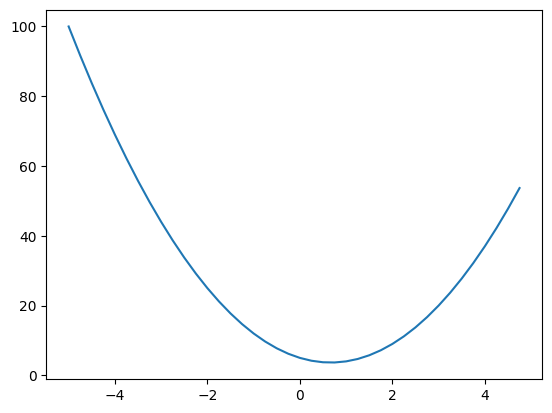

In [5]:
# plot the xs and ys
plt.plot(xs, ys)
plt.show()

we get a parabola

###What is a derivative?
- slope (rise/run): change in Y / change in X
-  derivative of a function is an infinitesimal change in the function with respect to one of its variables



```
( f(x + h) - f(x) ) / h  (h approaches 0)
```



Lets compute the slope at different x points
- postive slope

In [6]:
x = 3
f(x)

20

In [7]:
# x = 3, and h = 0.00001
x = 3
h = 0.000001
( f(x + h) - f(x) ) / h

14.000003002223593

- negative slope

In [8]:
# x = -3, and h = 0.00001
x = -3
h = 0.000001
( f(x + h) - f(x) ) / h

-21.999997002808414

- slope zero

In [9]:
# x = 2/3, and h = 0.00001
x = 2/3
h = 0.000001
( f(x + h) - f(x) ) / h

2.999378523327323e-06

Look at the plot and map the x and y and the computed slope.

#### Looking at a more complex example

In [10]:
## more complex example
a = 2.0
b = -3.0
c = 10.0

# the function
d = a * b + c

print(d)

4.0


In [11]:
## inputs
a = 2.0
b = -3.0
c = 10.0

# compute expression
d1 = a * b + c

# change factor
h = 0.0001
a+=h  # bumping up a with a tiny value, but since b is negative, we end up decreasing d

# compute d2
d2 = a * b + c

print('d1', d1)
print('d2', d2)
#print(f"the slope is: {( d2 - d1 ) / h}")

d1 4.0
d2 3.999699999999999


Think through why d2 went down!!


In [12]:
print(f"the slope is: {( d2 - d1 ) / h}")

the slope is: -3.000000000010772



Notice, we change `a` by `h`, and then we compute `d`, and slope is with respect to change in `a`, which means we compute here derivate of f() with respect to `a`, and which is basically `b` and we observe the computed derivative matches `b`

In [13]:
## inputs
a = 2.0
b = -3.0
c = 10.0

# compute expression
d1 = a * b + c

# change factor
h = 0.0001
b+=h  # bumping up b, so we are basically adding up to d, so we end up increasing d

# compute d2
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print(f"the slope is: {( d2 - d1 ) / h}")

d1 4.0
d2 4.0002
the slope is: 2.0000000000042206


we change `b` by `h`, and then we compute `d`, and slope is with respect to change in `b`, which means we compute here derivate of f() with respect to `b`, and which is basically `a` and we observe the computed derivative matches `a`

In [14]:
## inputs
a = 2.0
b = -3.0
c = 10.0

# compute expression
d1 = a * b + c

# change factor
h = 0.0001
c+=h  # bumping up c, we end up increasing d

# compute d2
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print(f"the slope is: {( d2 - d1 ) / h}")

d1 4.0
d2 4.0001
the slope is: 0.9999999999976694


Here the computed slope of f() with respect to `c` is 0.9999, and that matches expected derivative of `c` from experession to be 1

## Moving to Neural Networks

Note Neural Networks are complex/massive mathematical functions, and hence we need some data structure to maintain these expression

Skeleton of simple `Value` object

In [15]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):  # python will internally use the repr function to return the string representation
        return f"Value(data={self.data})"

a = Value(2.0)
a

Value(data=2.0)

So, we have here a `Value` object with data 2.0

In [16]:
## what happens if youskip over the __repr__ method, you get some cryptic output when create an object
class Value:

    def __init__(self, data):
        self.data = data

    # def __repr__(self):
    #     return f"Value(data={self.data})"

a = Value(2.0)
a

the __repr__ method helps printing out a nicer meaningful output

Implementing some operations

In [17]:
# implementing expression methods

class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

a = Value(2.0)
print('a', a)
b = Value(-3.0)
print('b', b)
c = Value(10.0)
print('c', c)
print()
print('a + b: ', a + b)
print('a * b: ', a * b)
print('a * b + c: ', a * b + c)

a Value(data=2.0)
b Value(data=-3.0)
c Value(data=10.0)

a + b:  Value(data=-1.0)
a * b:  Value(data=-6.0)
a * b + c:  Value(data=4.0)


What we are missing is the connective tissue of these expression. So inorder to keep up with expression graph, we need to use some pointers, using here `self.prev`

In [18]:
class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # add to children set, notice we using Value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
print('d:', d)

d: Value(data=4.0)


In [19]:
d.prev

{Value(data=-6.0), Value(data=10.0)}

In [20]:
b.prev

set()

In [21]:
d._op

'+'

Now, since these values are going to get larger, we would want to visualize our expression graph

In [22]:
from graphviz import Digraph

def trace(root):
    # build sets of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                #print(child)
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


In [23]:
print('d:', d)
print()
d_nodes, d_edges = trace(d)
d_nodes, d_edges

d: Value(data=4.0)



({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [24]:
# we will be using id of the value objects, let look at these
for n in d_nodes:
    print(str(id(n)))
    print(n._op)

139479133469184
*
139479133877776

139479133876336
+
139479133868176

139479133871392



In [25]:
## vizualization part
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR means left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for  it
        dot.node(name=uid, label="{ data %.4f }" % (n.data, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot



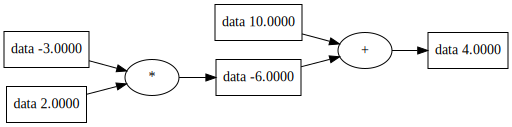

In [26]:
draw_dot(d)

That looks great!! We got this

lets tweak:
- the `Value class` to enhance the graph to include the labels(variable names) visble in the graph
- the inputs

In [27]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # add to children set, notice we using Value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

# inputs
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'



## vizualization part
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR means left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for  it
        dot.node(name=uid, label="{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

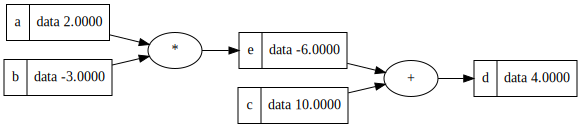

In [28]:
# Visualize d
draw_dot(d)

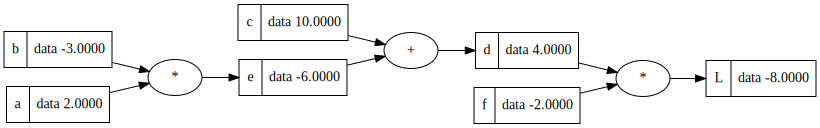

In [29]:
# making the expression a level deeper, by adding output as `L`
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

draw_dot(L)

Next step is Backpropogation, where in we have to compute derivative of `L` with respect to every variable. These variables here mimic weights of NN. (Remember in Neural Network, we compute gradients of Loss with respect to weights, inorder to optimize these. We don't compute gradients wrt data because data is fixed).

To get into the backpropogation, we will use a variable grad which will keep tract of the gradeints

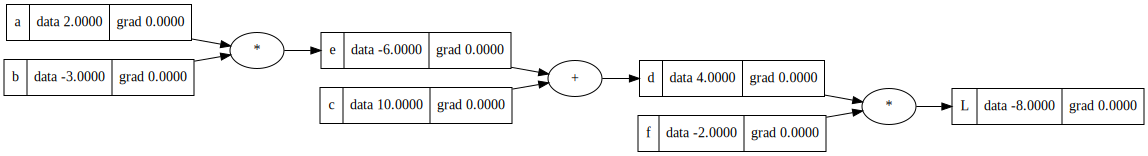

In [30]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self.prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+', self.grad) # add to children set, notice we using Value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

## vizualization part
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR means left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for  it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# inputs
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

draw_dot(L)

In [31]:
L.grad

0.0

### Working of Backpropogation

#### What is the derivative of L wrt L?
- it is 1


In [32]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data  #remember L is value object, we just want here the data

    a = Value(2.0, label='a') #bumping up a by h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data + h

    print((L2-L1)/h)

lol() # computing L wrt to L+h, expect is 1

1.000000000000334


In [33]:
#lets set L.grad as 1
L.grad= 1.0

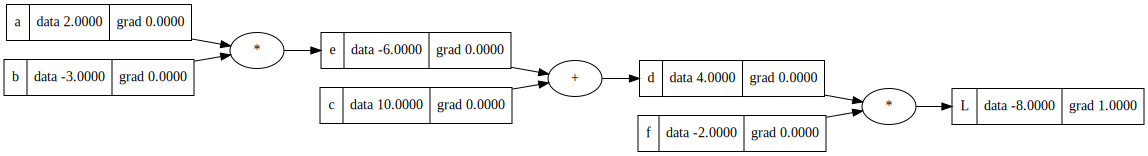

In [34]:
draw_dot(L)

#### What is derivative of `L` wrt to `f` and `d`?

L = d * f

dL / dd = ?  f

To prove:
derivative or slope is: `(f(x+h) - f(x)) / h`

```
= ( ( ( d + h ) * f ) - ( d * f ) ) / h
= ( ( d * f ) +  ( h * f ) - ( d * f) ) / h
= ( h * f ) / h
= f
```




So, derivatives of `f` and `d` is 4.0 and -2.0

In [35]:
# lets set that manually here
## dL/df
f.grad = 4.0

##dL/dd
d.grad = -2.0

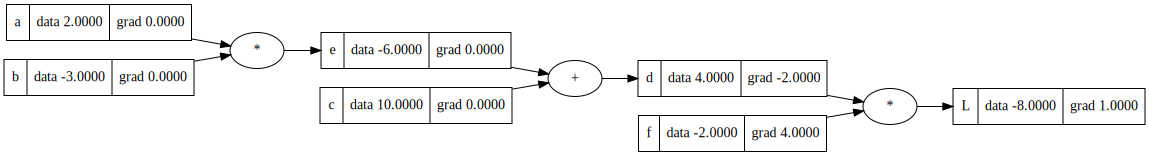

In [36]:
draw_dot(L)

lets also compute derivative of `L` wrt to `f` and `d` using our function

In [37]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data  #remember L is value object, we just want here the data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0 + h , label='f') #bumping up a by h
    L = d * f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol() # computing L wrt to f

3.9999999999995595


In [38]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data  #remember L is value object, we just want here the data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = (e + c); d.label='d'
    d.data += h #bumping up a by h
    f = Value(-2.0 , label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol() # computing L wrt to d

-2.000000000000668


#### What is the derivation of `L` wrt to `c` and `e`

What is the derivative of `L` wrt `c`, and for that we first figure out what is derivative of `d` wrt `c`, we already know derivative of `L` wrt `d`

d = c + e

dd / dc = ?  

To prove:
derivative or slope is: `(f(x+h) - f(x)) / h`

```
= ( ( c + h + e ) - ( c + e ) ) / h
= ( c + h + e - c - e ) / h
= h / h
= 1
```

And in the same way dd/de is 1

So we know how `c` and `e` impacts `d`, and we know how `d` imapcts `L`, what we want is how `c` and `e` impacts `L`, and the way we put all this together is using chain rule - Calculus

`d = c + e`

####[Chain Rule](https://en.wikipedia.org/wiki/Chain_rule)

`As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."`

as per Chain rule, dL/dc and dL/de will be:

`dL/dc = dL/dd * dd/dc` = -2 * 1 = -2

`dL/de = dL/dd * dd/de` = -2 * 1 = -2

Notice here that '+' (`d = c + e`) operation basically act as a router, it just routes the derivate `dL/dd` to `c` and `e` in this case, as `dd/dc` and `dd/de` is 1

In [39]:
e.grad = -2
c.grad = -2

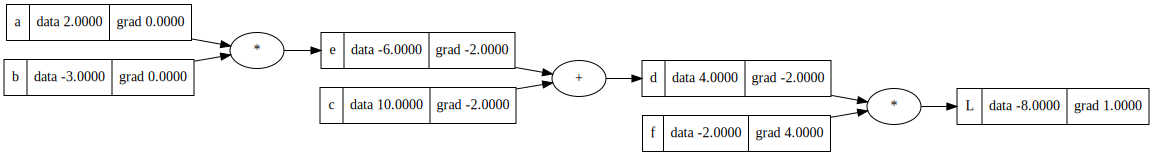

In [40]:
draw_dot(L)

####What is the derivation of L wrt a and b?

`e = a * b`

`de/db = a`

`de/da = b`

`dL/da = dL/de  * de/da` `= -2 * -3`

`dL/db = dL/de  * de/db` `= -2 * 2`



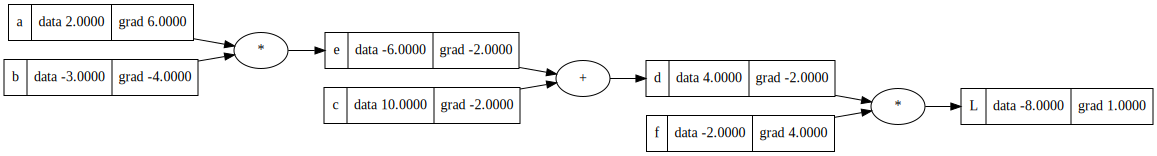

In [41]:
# set gradients
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

draw_dot(L)

In [42]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data  #remember L is value object, we just want here the data

    a = Value(2.0 + h, label='a') #bumping up a by h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = (e + c); d.label='d'
    f = Value(-2.0 , label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol() # computing L wrt to a

6.000000000000227


From above we understand that **backpropogation is just multiplication of the local derivatives**. We know what this local derivative are. So backpropogation, we go just go on recursuvely multiplying the local derivatives - recursive application of chain rule

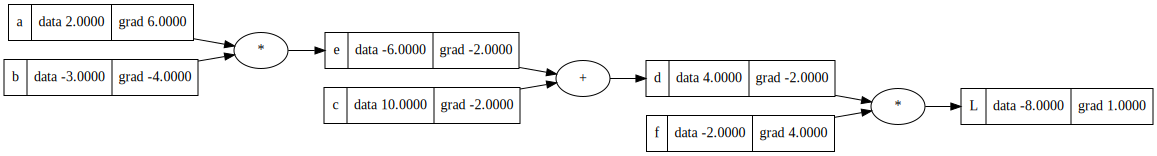

In [43]:
draw_dot(L)

#### Impact of input changes on L

In [44]:
# we will nudge our inputs in order for the L to go up
# so if we ant L to go up, we want to walk in the direction of gradient
# step_size be 0.01
# a, b, c,f are the leaf nodes on which we have control

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


In [45]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data  #remember L is value object, we just want here the data

    a = Value(2.0, label='a') #bumping up a by h
    b = Value(-3.0, label='b')
    b.data+=h # bumping up b by h
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = (e + c); d.label='d'
    f = Value(-2.0 , label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol() # computing L wrt to a

-3.9999999999995595


### Neuron

What is a simple neuron in Neural network?
 - mimics a biological neuron, which is far more complex that NN neuron
 - there is multiple inputs flowing fom axon of another neuron to cell body of the neuron. And then we have the synases which carry the weights. the inputs are multiplied by these weights. Weights are like the synaptic strength for each inputs.
 - neuron also has some bias (sort of innate trigger).the bias is added to the sum of all the $w_{i} * x_{i}$ and passes it to an activation function
 - this activation function is kind of squashing function like sigmoid, tanh, relu
 - output of a neuron is just the activation function applied to dot product of ws and xs and plus the bias f($\sum_{i=1}^n w_{i}.x_{i} + b)$

Let's look at tanh function and how are we gonna include it.

**tanh: Hyperbolic tangent**

`tanh(x)` =` sinh(x) / cosh(x)` = $e^x - e^{-x} / e^x + e^{-x}$

tanh at 0 is 0, for positive value its positive and then plateaus off at 1, similarly for negative values of x, the function is negative, and plateaus off at -1. So for large positive/negative values the funtcion eaturns 1/-1.

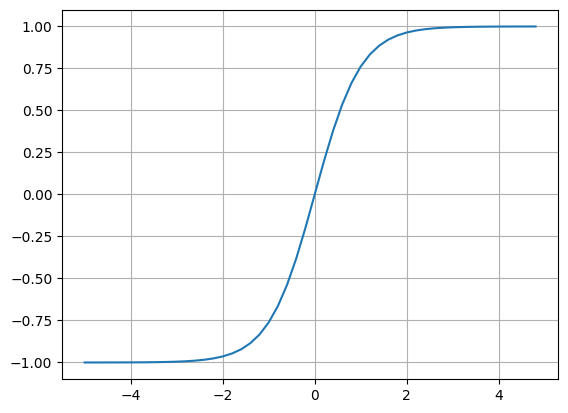

In [46]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()
plt.show()

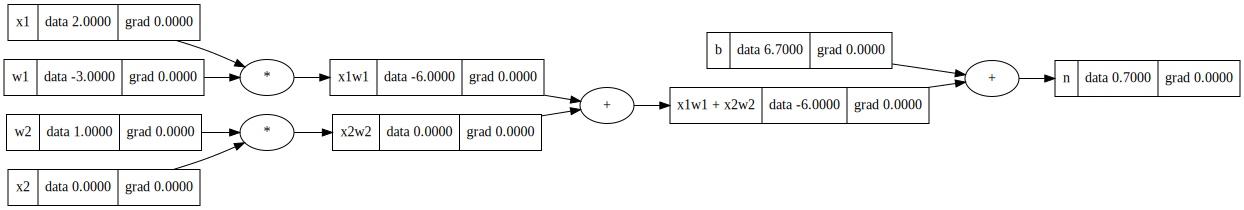

In [47]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.7, label='b')

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
#o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function

draw_dot(n)

We already have implemented add and mul operations in our data structure Value class. To include tanh, one way is to include exponentiation function in our module. But wait, we actually don't need build every function at atomic level, we can leverage the beauty of abstarction as long as we know how to differentiate it and create the local derivative. So, instead of including an exp function and buildin up the tanh function, we will include tanh in an abstract way

Let's add the tanh method to our Value class -

In [48]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self.prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # add to children set, notice we using Value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

Rerun the neuron code with activation function included

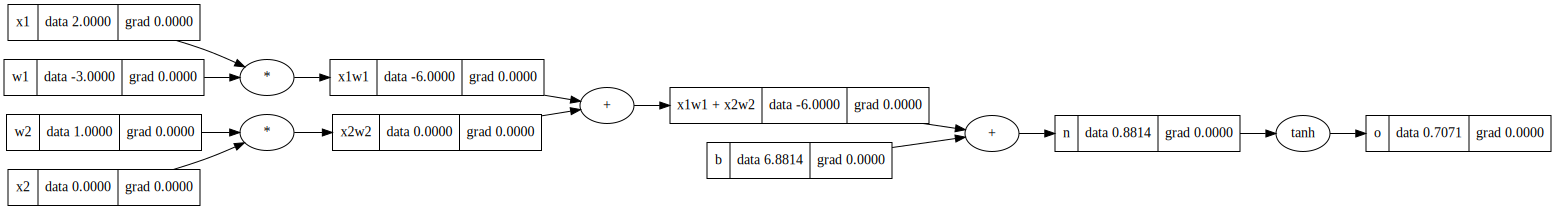

In [49]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# visualize
draw_dot(o)

In a Neural Network, what we care is the derivatives of ouput wrt to the weights, because that is what we will be adjusting in order to optimize. Remember  this just one neuron,in a typicla Neural network, there will be many such neurons, with  many inputs and weights, and then the output and eventually the Loss function, based on which we backpropogate and adjust the wait to optimize

### Lets start with the backpropogation

1. what is derivative of `o` wrt to `o`? it is 1

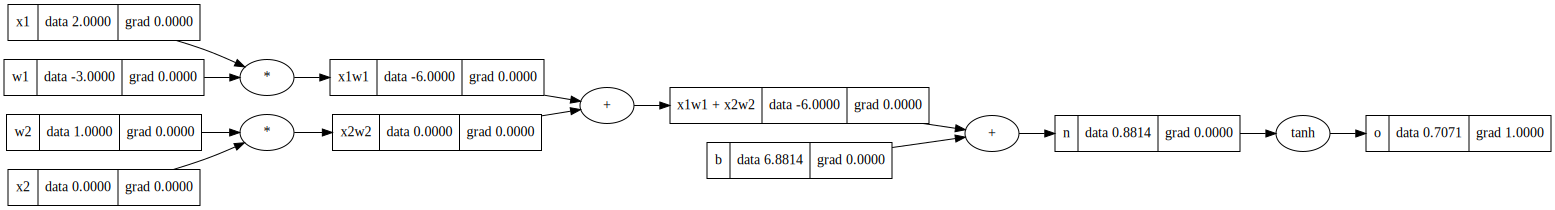

In [50]:
o.grad=1.0
draw_dot(o)

2. backpropogate to tanh

derivative of tanh is: 1 - $tanh(x)^2$

In [51]:
# the derivative of o wrt n
1 - o.data ** 2

0.5000070710928113

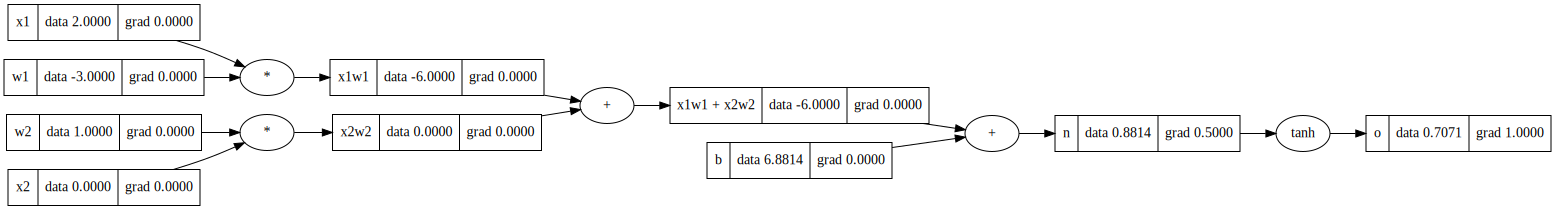

In [52]:
# set the n gradient
n.grad = 0.5

#visualize
draw_dot(o)

3. backpropogate to (x1w1 + x2w2) and bias

We know that backpropogation thorugh a '+' node is just distributing the gradient.


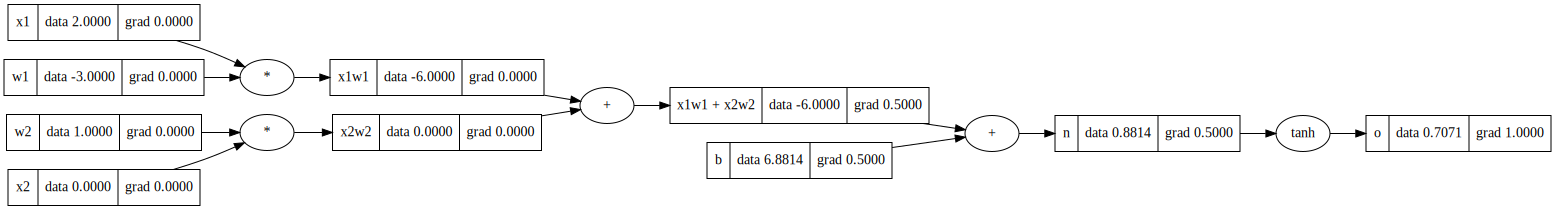

In [53]:
# set gradients
x1w1x2w2.grad = 0.5
b.grad = 0.5

#visualize
draw_dot(o)

4. backpropogate to x1w1 and x2w2

We need again to backpropogate through a '+' operation, just ditributing the earlier gradient

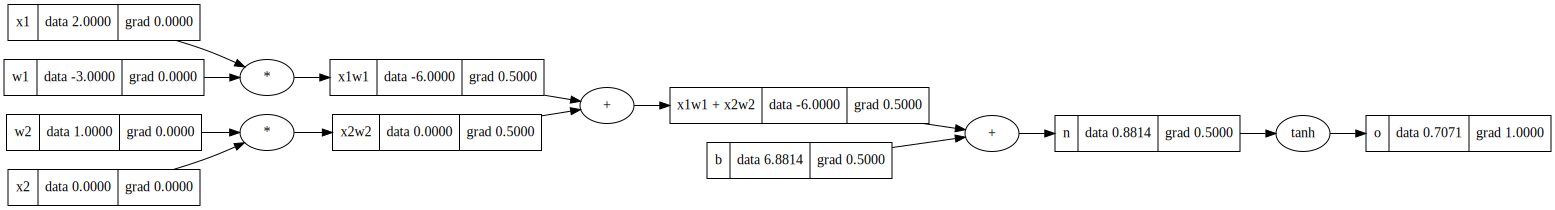

In [54]:
# set gradients
x1w1.grad = 0.5
x2w2.grad = 0.5

#visualize
draw_dot(o)

5. backpropogate to w1, x1 and w2, x2

Keep in mind, every point in time along here, these gradient is signifying the impact on output -
Notice the x1w1 and x2w2 gradients are positive, which signifies that if we want the output of the neuron to increase, then the influence of these input expression is making positive contribution to the output


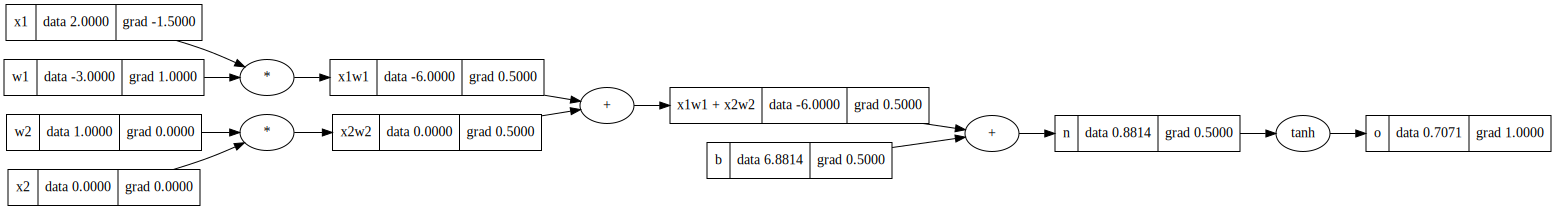

In [55]:
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

#visualize
draw_dot(o)

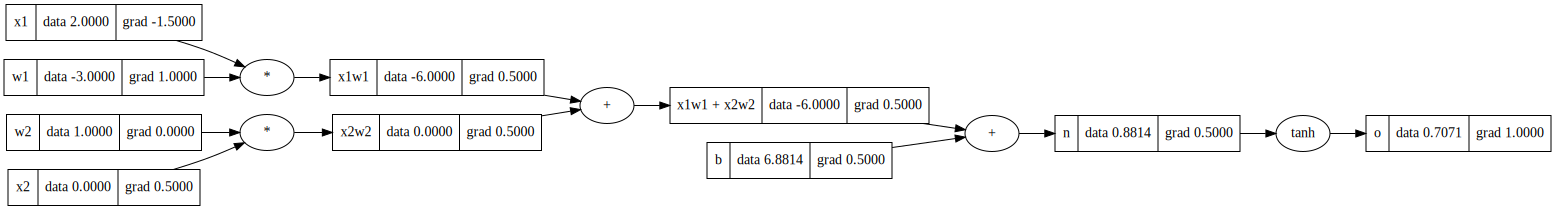

In [56]:

w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad

#visualize
draw_dot(o)

we see that gradient for w2 is 0.0, because the data x2 is 0.0. This is intuitively correct, derivative always tell us the influence of the expression on the output, if i nudge w2 a bit, it will not have any effect on the output because we multiplying by 0.0 (the data x2 is 0.0). Because it is not changing, the derivative is 0.0

So those are our gradients on backpropogation.

#### Understanding what factors actually influences the outputs
Now if want our output to increase:

- w2 has no influence, as the x2.data is 0.0
- w1 can influence with its positive derivative of 1, should go up inorder to increase the ouput
- likewise all factors/weights with positive gradient when increased influence the output positively

### Automating the Backpropogation

We will automate the backpropogation, instead of manually computing and updating the gradient which we were doing until now for better understanding the concept

We will create _backward() function, which will not do anything for leaf nodes

In [57]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None # empty function, so leaf node it will do nothing
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        # backward function, we want to backpropogate the out.grad to self and other
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

We will redefine our expression and make sure all grads are now 0.0

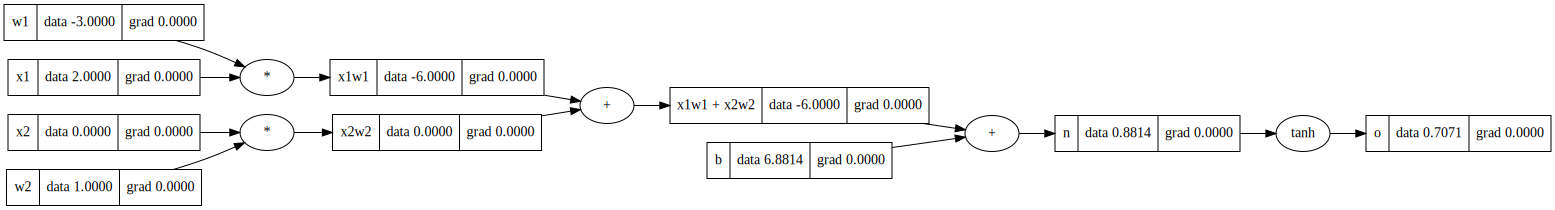

In [58]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# visualize
draw_dot(o)

We will be calling our backward function in order. Remember the first backward we will call is o._backward, and not that out.grad is currently set to 0.0, as it s all initialized with 0.0. So we need to set that to 1.0 and then call thebackward functions

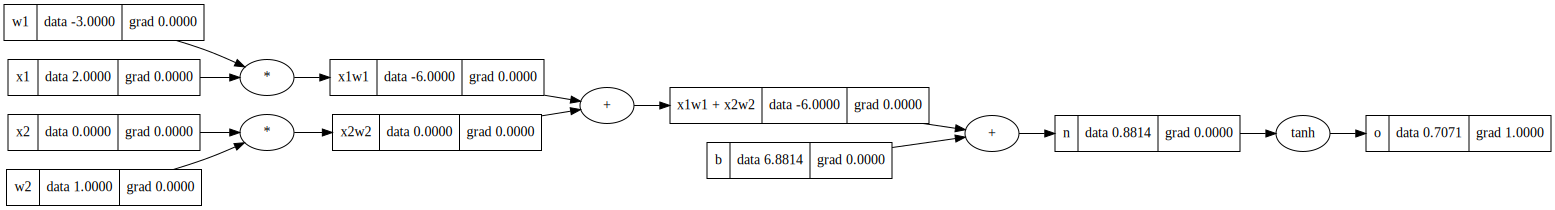

In [59]:
o.grad=1.0
draw_dot(o)

In [60]:
o._backward()

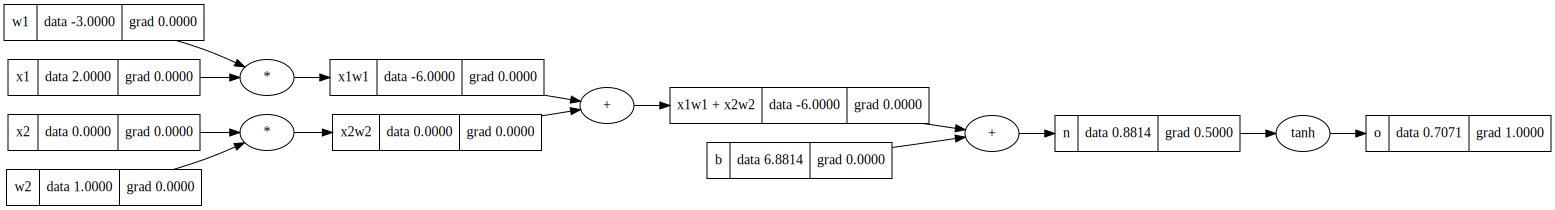

In [61]:
draw_dot(o)

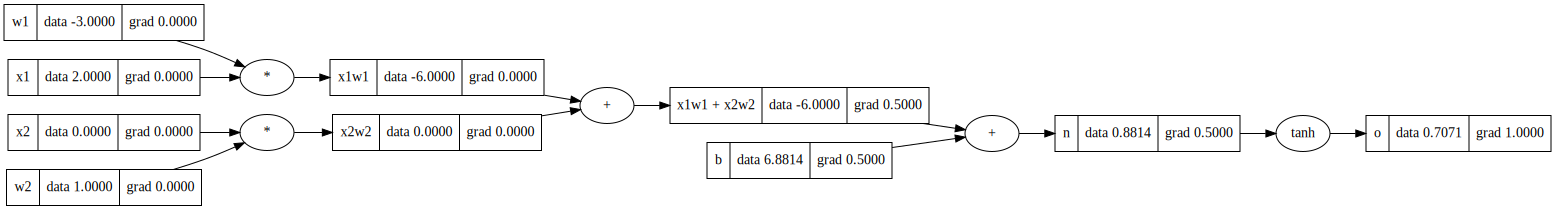

In [62]:
n._backward()
draw_dot(o)

In [63]:
b._backward() ## note b is leaf node, and for leafnodes we are just doing nothing when backward is called on it, we could although call the funtion

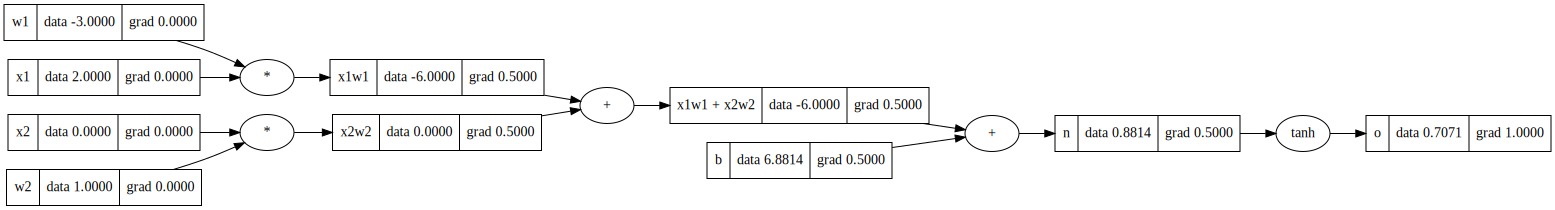

In [64]:
x1w1x2w2._backward()
draw_dot(o)

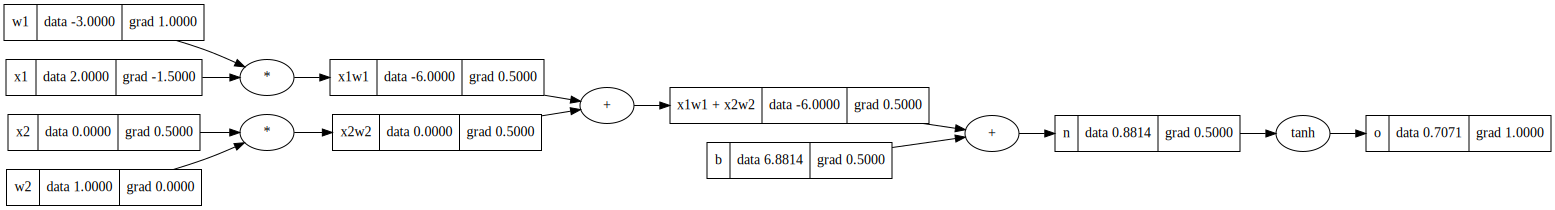

In [65]:
x1w1._backward()
x2w2._backward()

draw_dot(o)

#### Ordering of the graphs

One last thing, we need to get rid of calling this backward function manually. We have laid out all the expression, and then we have flow backward through it. Saying that, we never want to call a backward for any node before we done evrthing after it means until, we have actually done the forward pass, until we have all that has to propogate back.

This ordering of graph can be achieved by topological sort

In [66]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.8813635870195435),
 Value(data=0.8813635870195435),
 Value(data=0.7071017811511924)]

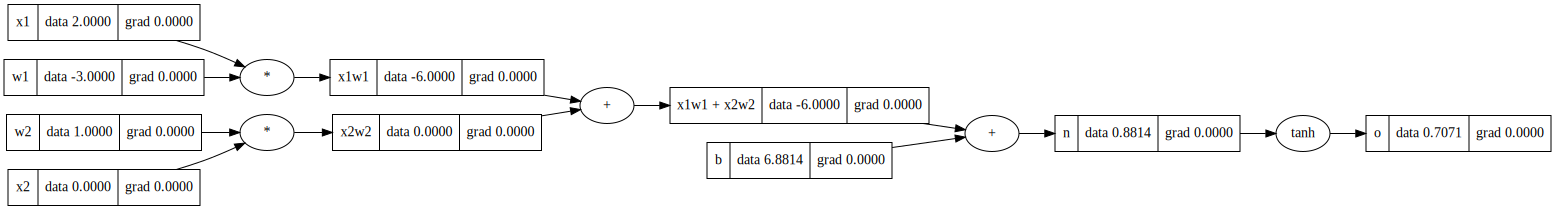

In [67]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# visualize
draw_dot(o)

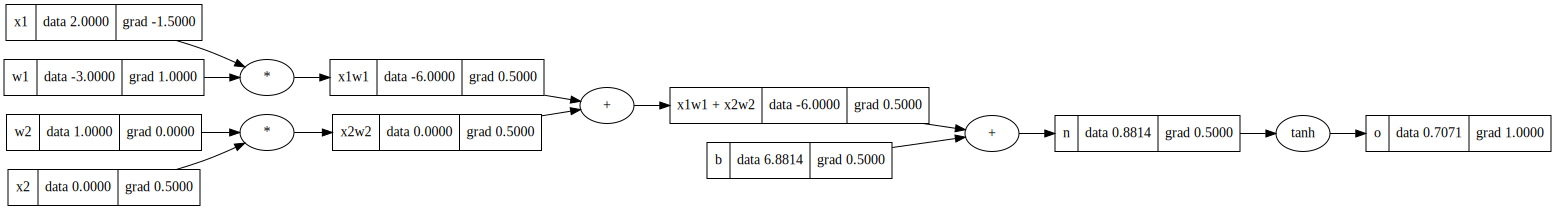

In [68]:
# set o.grad
o.grad = 1.0

# function to build the topological graph
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

# call backward function on the nodes
for node in reversed(topo):
    node._backward()


draw_dot(o)

We will hide this functionality under Value class

In [69]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None # empty function, so leaf node it will do nothing
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        # backward function, we want to backpropogate the out.grad to self and other
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) # starting at output

        self.grad=1.0
        for node in reversed(topo):
            node._backward()


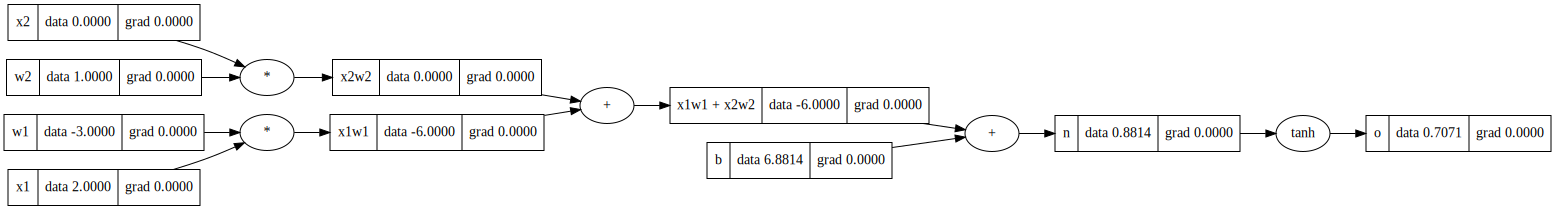

In [70]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# visualize
draw_dot(o)

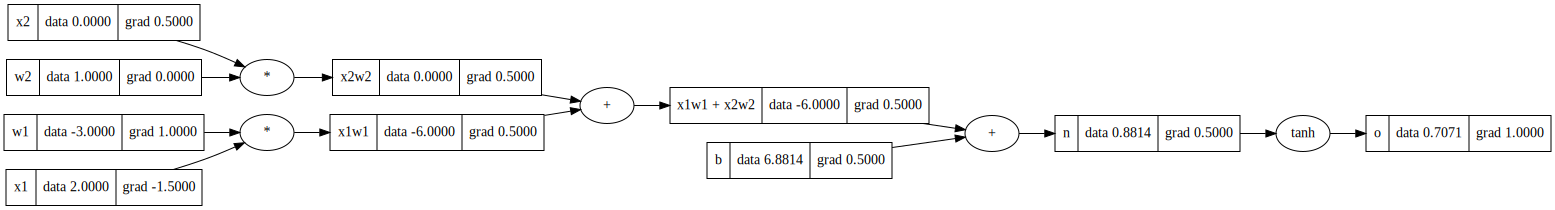

In [71]:
# call o.backward()
o.backward()
draw_dot(o)

So, thats our one neuron backpropogation working.

But we have a bug here, lets test it out!

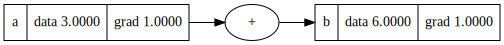

In [72]:
a = Value(3.0, label='a')
b = a + a
b.label='b'
b.backward()
draw_dot(b)


a + a = b

gradient of `a` wrt `b` = `db/da `= 1 + 1 = 2

gradient for a is 1, should be 2. This is because in our code, for add method we just distribute the gradients to the precursors, but here in this case, the precursors are same


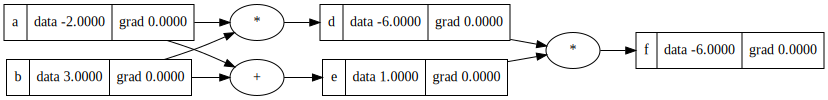

In [73]:
# lets see a complex experession
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

draw_dot(f)

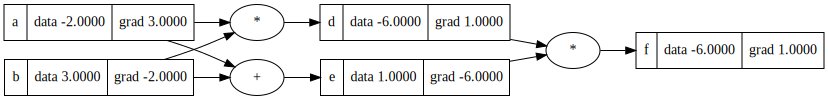

In [74]:
f.backward()
draw_dot(f)


problem is happening because we are using same variables more than once which wasn't the cases seen earlier.

Refer - Wikipedia-Multivariable calculus, In that case, we would need to accumulate the gradients

In [75]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad # using += to accumulate any gradient backpropogated to it
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()


Lets try problem cases again

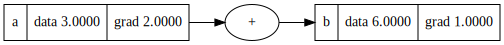

In [76]:
a = Value(3.0, label='a')
b = a + a
b.label='b'
b.backward()
draw_dot(b)

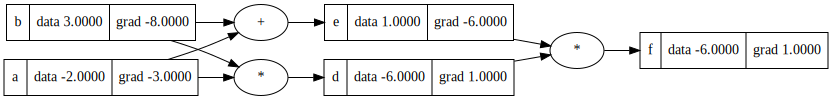

In [77]:
# lets see a complex experession
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f)

#### Implementing some more methods in the Value class

We will add here:
- some more capabilities to the module
- implementing tanh - from atomic level for practice sake

1. we cannnot do any operation for value object with a scaler value directly, e.g.,

In [78]:
a = Value(2.0, label='a')
a + 11

AttributeError: ignored

so idea is to wrap with `Value()` anything passed other than Value object

In [79]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad # using += to accumulate any gradient backpropogated to it
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()


In [80]:
a = Value(2.0, label='a')
a + 11

Value(data=13.0)

In [81]:
a = Value(2.0, label='a')
a * 2

Value(data=4.0)

In [82]:
a = Value(2.0, label='a')
3 * a

TypeError: ignored

Why is other way not working? 3 * a

When we do `a * 2`, Python will call `a.__mul__(2)`. And `2 * a` mean `2.__mul__(a)` which is confusing to python

In python we can define something called `__rmul__()`, its like a fallback, so if `2 * a` doesn't work, it makes a check if the other way `a*2` works or not

In [83]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad # using += to accumulate any gradient backpropogated to it
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other): ## other * mul
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad = out.data *  out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()


In [84]:
a = Value(2.0, label='a')
3 * a

Value(data=6.0)

In [85]:
a = Value(2.0, label='a')
a.exp()

Value(data=7.38905609893065)

**implementing division**

We will implement here something more powerful than division.

Division can be reshuffled as follows:

= $a / b$

= $a * 1 / b$

= $a * (b**-1)$

So we will implement case of $x**k$ where k is some constant, k= -1 (which is division) is its one case


we will also be **implementing subtraction** by addition of a negation, and implement negation also

In [86]:
a = Value(3.0, label='a')
b = Value(2.0, label='b')
a / b

TypeError: ignored

In [87]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label=label


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad # using += to accumulate any gradient backpropogated to it
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        #backward function
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int and float for now"
        out = Value(self.data ** other, (self, ), f"**{other}")

        def _backward():
            self.grad = (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def __radd__(self, other): ## other + self
        return self + other

    def __rmul__(self, other): ## other * self
        return self * other

    def __truediv__(self, other):
        return self * (other ** -1)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad = out.data *  out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()


In [88]:
a = Value(3.0, label='a')
b = Value(2.0, label='b')
a / b

Value(data=1.5)

In [89]:
a = Value(3.0, label='a')
b = Value(2.0, label='b')
a - b

Value(data=1.0)

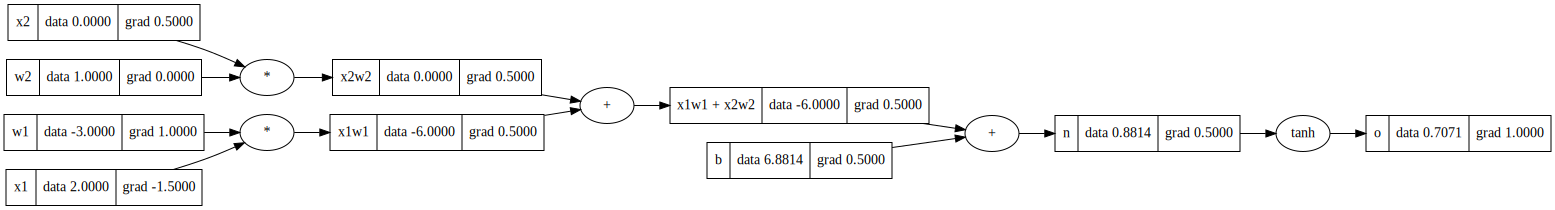

In [90]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

#activation
o = n.tanh()  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# backward pass
o.backward()

# visualize
draw_dot(o)

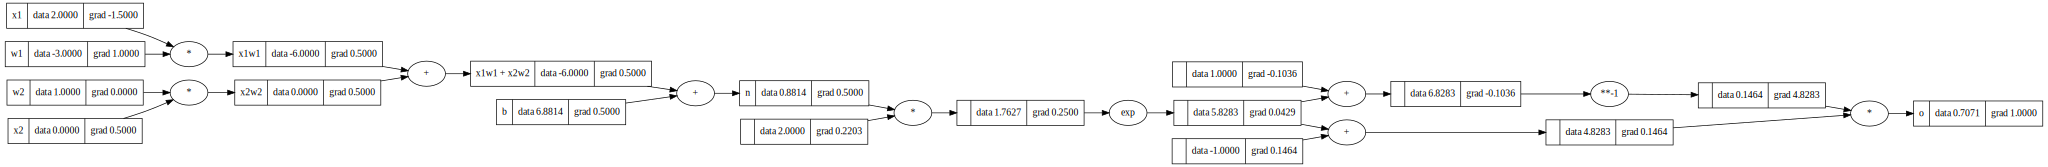

In [91]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813635870195432, label='b') # intentionally using the value so that backpropogation number are nice

#x1w1, x2w2
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'

n = x1w1x2w2 + b; n.label='n'

# activation
e = (2*n).exp()
o = (e - 1) / (e + 1)  # note we won't do a tanh operation here as we haven't implemented that function
o.label='o'

# backward pass
o.backward()

# visualize
draw_dot(o)

We observe that we broke the tanh into bunch of atomic operation, since the operation is equivalent we end up with same output and observe same gradients for the precursors

### Using Pytorch

The micrograd engine was working with scaler values, while pytorch works with tensors(n-dim arrays). Those are the inputs which we work in actual pytoch library.

Mimicking above neuron example, few things to note:
- casting here values to double, as python by default use double precision for floating number. so that we get values similar to our micrograd
- the nodes we are creating are just leaf nodes, so we need to explicitly set them for requires_grad as True

In [92]:
import torch

In [93]:
print(torch.Tensor([[1., 2.], [3., 4.]]).dtype)
print(torch.Tensor([[1., 2.], [3., 4.]]).double().dtype)

torch.float32
torch.float64


In [94]:
# pytorch

x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
b = torch.Tensor([6.8813635870195432]).double() ; b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item()) # returns just the element
o.backward()

print('=================')
print(f"x2 grad: {x2.grad.item()}")
print(f"w2 grad: {w2.grad.item()}")
print(f"x1 grad: {x1.grad.item()}")
print(f"w1 grad: {w1.grad.item()}")


0.7071016835781376
x2 grad: 0.5000072090809633
w2 grad: 0.0
x1 grad: -1.50002162724289
w1 grad: 1.0000144181619266


In [95]:
print(o)
print(o.item())
print(o.data.item())

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)
0.7071016835781376
0.7071016835781376


So we get very similar results. The big deal with pytorch, that here we are working with tensors, making the process significantly more efficient. With tensors we can do lot of these operations in parallel.

Otherwise, the implemented micrograd is very much similar to the pytoch api

## Building Neural Nets

Now that we have a core machinery to build complicated mathematical expression, we can also start building up Neural Nets. Neural Nets are just a special class of mathematical expressions

In [96]:
import random

In [98]:
class Neuron:

    def __init__(self, nin): #nin: number of inputs
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): ## forward pass
        # w*x + b operation)
        act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b #this line was throwing error, added __radd__ method to Value class to ignore order
        out = act.tanh()
        return out


x = [2.0, 3.0]
n = Neuron(2)
print(n(x))
print()


class Layer:

    def __init__(self, nin, nout): #nout number of neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs


x = [2.0, 3.0]
n = Layer(2, 3)
print(n(x))
print()


class MLP:

    def __init__(self, nin, nouts): # unlike Layer, we have here list of nouts, defining the size of different layers
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)


Value(data=0.9422724142123368)

[Value(data=0.22988557736226528), Value(data=0.9908046661009465), Value(data=-0.736636365268235)]



Value(data=-0.013523617697609671)

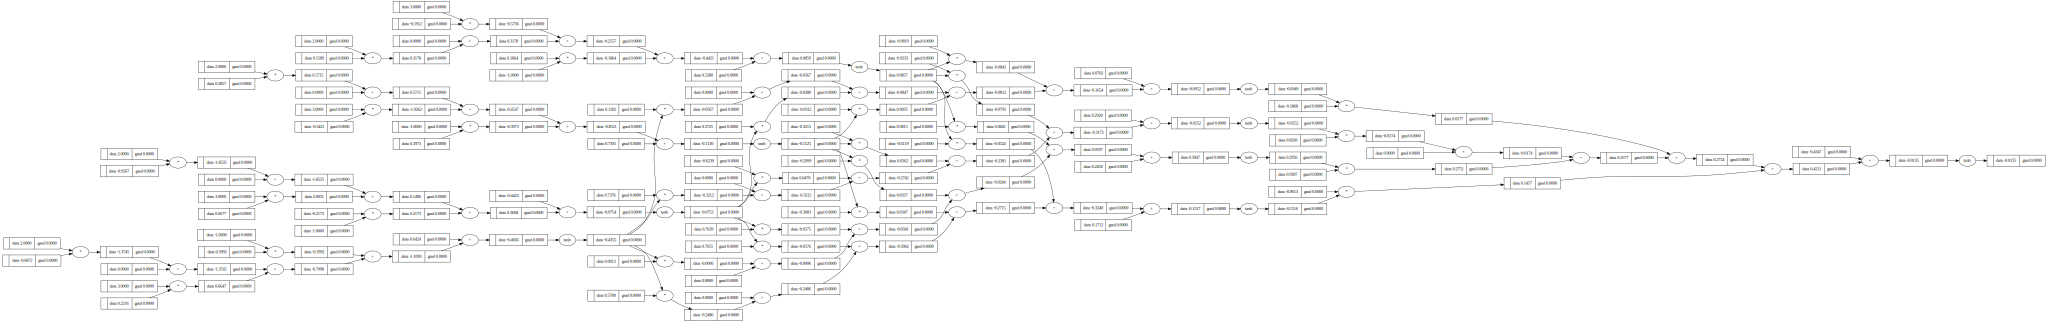

In [99]:
draw_dot(n(x))

Lets create a tiny dataset and wok through it

In [100]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets (simple binary classifier)
y_pred = [n(x) for x in xs]
y_pred

[Value(data=-0.013523617697609671),
 Value(data=0.19645521891652043),
 Value(data=0.3661204828614341),
 Value(data=0.26286826066468755)]

Now we need to tune our Neural Network to predict the y_pred as close as ys. The trick used in the Neural network to do this is using a single number that some how measures the performance of the NN, that single number is the Loss. We would aim to minimize the loss. We will use here MSE.

Computing the loss

In [101]:
# the individual losses
[(yout - ygt)**2 for ygt, yout in zip(ys, y_pred)]

[Value(data=1.0272301236308505),
 Value(data=1.431505090872579),
 Value(data=1.866285173693558),
 Value(data=0.5433632011355031)]

In [102]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=4.868383589332491)

In [103]:
loss.backward()

In [104]:
## looking at gradient of one of the weights
n.layers[0].neurons[0].w[0].grad

0.3100526427816488

Since its negative, we know that it has a negative impact on the Loss, so slightly increasing this weight will bring loss down

Note we don't care about gradients of inputs, since those are fixed factors. We would need to nudge the weights inorder to optimize.

### Weight parameters
Now we will write a code to gather all the parameters, so that we can play with it

In [192]:
class Neuron:

    def __init__(self, nin): #nin: number of inputs
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): ## forward pass
        # w*x + b operation)
        act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b #this line was throwing error, added __radd__ method to Value class to ignore order
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:

    def __init__(self, nin, nout): #nout number of neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        ##alternate code
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params


class MLP:

    def __init__(self, nin, nouts): # unlike Layer, we have here list of nouts, defining the size of different layers
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]



In [193]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.9458678746169102)

In [194]:
n.parameters()

[Value(data=-0.9758219230906884),
 Value(data=-0.6534599140675958),
 Value(data=0.39201545066552845),
 Value(data=0.37230687948138064),
 Value(data=-0.15167878556932157),
 Value(data=0.42856871316552847),
 Value(data=-0.883777916026838),
 Value(data=-0.4108801855628308),
 Value(data=-0.10640786357434306),
 Value(data=-0.41310987597220583),
 Value(data=0.14753603464703602),
 Value(data=0.6292116981453526),
 Value(data=-0.8217680725186693),
 Value(data=-0.798152891475896),
 Value(data=0.7315464159869456),
 Value(data=-0.4862432961282628),
 Value(data=-0.20370542924194734),
 Value(data=-0.9426703409406232),
 Value(data=0.2315329134574513),
 Value(data=0.7712978097109944),
 Value(data=-0.061190864982460846),
 Value(data=0.4676229709449331),
 Value(data=-0.7934649426840621),
 Value(data=0.9401650892105924),
 Value(data=0.6999825377430828),
 Value(data=0.07552738706573581),
 Value(data=0.09858355898452564),
 Value(data=-0.5635070635961792),
 Value(data=-0.1558050425374109),
 Value(data=0.776

In [195]:
# total parameters
len(n.parameters())

41

In [196]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets (simple binary classifier)
y_pred = [n(x) for x in xs]
y_pred

[Value(data=-0.9458678746169102),
 Value(data=-0.48299224265549456),
 Value(data=-0.5853268095635941),
 Value(data=-0.9641852176909933)]

In [197]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=8.083676230883048)

In [198]:
loss.backward()

In [199]:
len(n.parameters())

41

In [200]:
n.layers[0].neurons[0].w[0].grad

0.13315256563472225

In [201]:
n.layers[0].neurons[0].w[0].data

-0.9758219230906884

if the gradient is negative, then increasing the weight value makes the loss go down. Conversely if the gradient is positive, decreasing the weight value makes the loss go down.

## Gradient descent

Intuition: Gradient vector is a vector which is pointing in the direction of increasing the loss. we want to minimize the loss. In Gradient Descent, we update the weight in opposite direction of gradients.
so we update weight with negative gardient in samll step-size

In [202]:
# update weights
for p in n.parameters():
    p.data += -0.01 * p.grad

lets look at the weight we observed earlier, how its affected. So we see the value is increase

In [203]:
n.layers[0].neurons[0].w[0].data

-0.9771534487470356

lets recalculate the loss

In [204]:
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=7.96953448622916)

Note we have loss slightly decreased, which means improvement

In [205]:
## forward pass
print(n.layers[0].neurons[0].w[0].data) # keeping track of this particular weight

# make prediction
y_pred = [n(x) for x in xs]

# compute loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
print(loss)

# backward pass
loss.backward()

# update weights
for p in n.parameters():
    p.data += -0.01 * p.grad

-0.9771534487470356
Value(data=7.96953448622916)


rerun it for few times, you will notice the loss decreasing. Beautiful!!!

In [216]:

print(n.layers[0].neurons[0].w[0].data) # keeping track of this particular weight

## forward pass
# make prediction
y_pred = [n(x) for x in xs]

# compute loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
print(f"loss:{loss.data}")

# backward pass
loss.backward()

# update weights
for p in n.parameters():
    p.data += -0.01 * p.grad

-1.0059242333552456
loss:0.2386073962216473


In [218]:
ys

[1.0, -1.0, -1.0, 1.0]

In [217]:
y_pred

[Value(data=0.9866151127786856),
 Value(data=-0.7946590370177778),
 Value(data=-0.5572501487496969),
 Value(data=0.9846409910772801)]

Changing the learning rate

rerun for couple of times to learn the trend with learning rate set to 0.1

In [223]:
print(n.layers[0].neurons[0].w[0].data) # keeping track of this particular weight

## forward pass
# make prediction
y_pred = [n(x) for x in xs]

# compute loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
print(f"loss:{loss.data}")

# backward pass
loss.backward()

# update weights
for p in n.parameters():
    p.data += -0.1 * p.grad

-0.8614134523907285
loss:7.941573756951133


In [225]:
y_pred

[Value(data=-0.9984085470342594),
 Value(data=-0.9999607406786721),
 Value(data=-0.9999999855761655),
 Value(data=-0.9869416283701588)]

Oops! so it was going good for first two runs we got the y_pred very close to ys. But in subsequent run, got overshot and ended up higher loss. Choosing a higher learning rate is not a good idea

Lets put the Gradient descent in a neat code

In [255]:
# model
n = MLP(3, [4, 4, 1])

# data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets (simple binary classifier)

In [256]:
# Training for 20 epochs, learning rate - 0.05

for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))

    # backward pass
    loss.backward()

    # update weights
    for p in n.parameters():
        p.data += - 0.05 * p.grad


    print(f"{k} loss:{loss.data}")

0 loss:7.677835439695201
1 loss:5.938515142233748
2 loss:3.452010706188479
3 loss:2.335644135625864
4 loss:3.1329772256540016
5 loss:1.2055186629158232
6 loss:0.2967586987650784
7 loss:0.3737318211513237
8 loss:0.23414547326327748
9 loss:0.035017192053185875
10 loss:0.0030107560898931067
11 loss:0.0013605977548486197
12 loss:0.0014815719456078894
13 loss:0.0018464797359698624
14 loss:0.0024632860020542212
15 loss:0.003402309187887896
16 loss:0.004704316165644228
17 loss:0.006283524687574804
18 loss:0.007797899408169312
19 loss:0.008600933255470173


In [257]:
y_pred

[Value(data=0.9977628411147141),
 Value(data=-0.9073091062579659),
 Value(data=-0.9999999997199103),
 Value(data=0.9979199536315018)]

### Common mistake - Let's fix the bug
We have a bug here - in `Value` class, if you remember for `self.grad` we do a `+=`, basically for accumulating the grad (to accomodate - same variable used more than once case), so when we nudge the weights and after forward pass. We need to reset the parameter grads to zero and then backpropogate.  

The reason you see the buggy code working, because our problem is quiet simple one. the grad kept on accumulating, which gave us increased step size, converging faster

In [263]:
# model
n = MLP(3, [4, 4, 1])

# data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets (simple binary classifier)

In [266]:
# Training for 20 epochs, learning rate - 0.05
## run couple of times
## play with learning rate

for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update weights
    for p in n.parameters():
        p.data += - 0.1 * p.grad


    print(f"{k} loss:{loss.data}")

0 loss:0.013893661497771551
1 loss:0.013278322296446064
2 loss:0.012719731172566822
3 loss:0.012209696457484305
4 loss:0.011741626446109227
5 loss:0.011310143101732818
6 loss:0.010910804669116494
7 loss:0.010539902618330446
8 loss:0.010194310413318676
9 loss:0.009871369112297338
10 loss:0.009568799601531605
11 loss:0.009284634393124503
12 loss:0.009017164001613545
13 loss:0.008764894328290815
14 loss:0.00852651245802935
15 loss:0.008300858957393836
16 loss:0.00808690524915244
17 loss:0.007883734988732485
18 loss:0.007690528623786515
19 loss:0.007506550506657716


In [265]:
y_pred

[Value(data=0.9322708881316202),
 Value(data=-0.9441321144601903),
 Value(data=-0.9466964305271542),
 Value(data=0.9365463445626999)]

We fixed the bug, and run our code, and also able to minimize the loss to a good deal. We observe the `y_pred` very close to `ys`.

That's it!

In [267]:
## End Note
print("Give, and it will be given to you. Good measure, pressed down, shaken together, running over, will be put into your lap. For with the measure you use it will be measured back to you. Luke 6:38")

Give, and it will be given to you. Good measure, pressed down, shaken together, running over, will be put into your lap. For with the measure you use it will be measured back to you. Luke 6:38
